# Time Series Visualizer

***

## Libraries

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

***

## Step by Step Process

<font color=blue>__Import data:__</font>

Note: setting index column to 'date'

In [64]:
df = pd.read_csv('fcc-forum-pageviews.csv', sep=',', index_col='date', parse_dates=['date'])

df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


<font color=blue>__Clean data:__</font>

In [65]:
df = df[
    (df['value'] >= df['value'].quantile(0.025)) &
    (df['value'] <= df['value'].quantile(0.975))
]

df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


<font color=blue>__Draw Line Plot Chart:__</font>

__Draw line plot:__

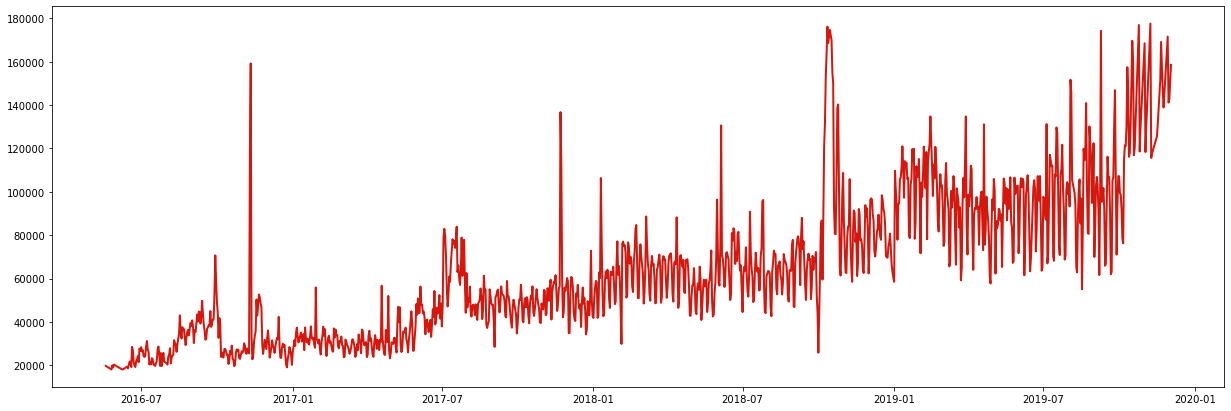

In [66]:
fig, ax = plt.subplots(figsize=(21, 7))
ax.plot(df.index, df['value'], linestyle='-', color='#D5170E', linewidth=2)

__Set graphic layout:__

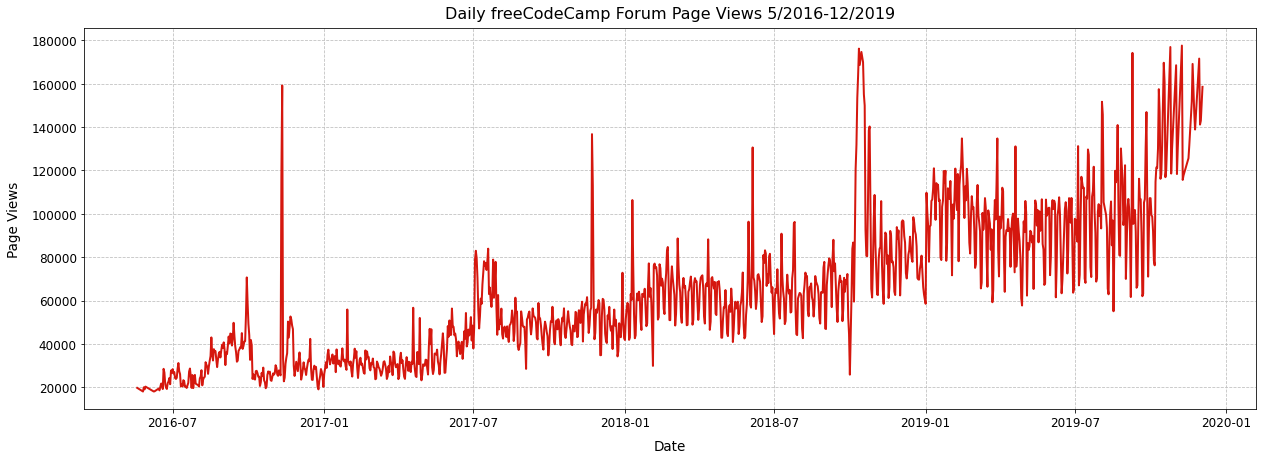

In [67]:
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019', pad=10.0, fontsize=16)
ax.set_ylabel('Page Views', labelpad=10.0, fontsize=13.5)
ax.set_xlabel('Date', labelpad=10.0, fontsize=13.5)
plt.setp(ax.get_xticklabels(), fontsize=12)
plt.setp(ax.get_yticklabels(), fontsize=12)
ax.grid(True, color='#c0c0c0', linestyle='--')

fig

__Save the Draw Line Plot graphic:__

In [68]:
fig.savefig('line_plot.png')

<font color=blue>__Draw Heat Map:__</font>

In [69]:
df_bar = df.copy()
df_bar

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [70]:
df_bar['month'] = df_bar.index.month
df_bar['year'] = df_bar.index.year

df_bar

,value,month,year
date,,,
2016-05-19,19736,5,2016
2016-05-26,18060,5,2016
2016-05-27,19997,5,2016
2016-05-28,19044,5,2016
2016-05-29,20325,5,2016
...,...,...,...
2019-11-24,138875,11,2019
2019-11-29,171584,11,2019
2019-11-30,141161,11,2019


In [71]:
df_bar = df_bar.groupby(['year', 'month'])['value'].mean()

df_bar

year  month
2016  5         19432.400000
      6         21875.105263
      7         24109.678571
      8         31049.193548
      9         41476.866667
      10        27398.322581
      11        40448.633333
      12        27832.419355
2017  1         32785.161290
      2         31113.071429
      3         29369.096774
      4         30878.733333
      5         34244.290323
      6         43577.500000
      7         65806.838710
      8         47712.451613
      9         47376.800000
      10        47438.709677
      11        57701.566667
      12        48420.580645
2018  1         58580.096774
      2         65679.000000
      3         62693.774194
      4         62350.833333
      5         56562.870968
      6         70117.000000
      7         63591.064516
      8         62831.612903
      9         65941.733333
      10       111378.142857
      11        78688.333333
      12        80047.483871
2019  1        102056.516129
      2        105968.357143
  

In [72]:
df_bar = df_bar.unstack(level=-1, fill_value=0)

df_bar

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,0.000000,0.000000,0.000000,0.000000,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


__Rename the columns:__

In [73]:
df_bar.columns = [
        'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
]

df_bar

,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,0.000000,0.000000,0.000000,0.000000,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


<font color=blue>__Draw Bar Plot:__</font>

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

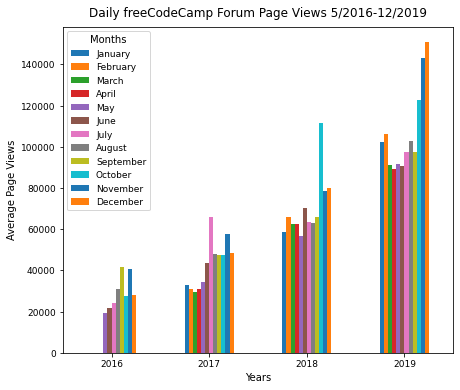

In [74]:
fig = df_bar.plot(figsize=(7, 6), kind='bar', legend=True, xlabel='Years', ylabel='Average Page Views').figure

# Set graphic layout:
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019', pad=10.0, fontsize=12)
plt.legend(loc='upper left', title='Months', fontsize=9)
plt.xticks(fontsize=9, rotation=0)
plt.yticks(fontsize=9)

__Save Bar Plot Graphic:__

In [75]:
fig.savefig('bar_plot.png')

<font color=blue>__Draw Box Plot:__</font>

__Prepare data for box plots:__

In [76]:
df_box = df.copy()
df_box

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [77]:
df_box.reset_index(inplace=True)
df_box

,date,value
0,2016-05-19,19736
1,2016-05-26,18060
2,2016-05-27,19997
3,2016-05-28,19044
4,2016-05-29,20325
...,...,...
1233,2019-11-24,138875
1234,2019-11-29,171584
1235,2019-11-30,141161
1236,2019-12-01,142918


In [78]:
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


__Draw box plots (using Seaborn):__

In [79]:
df_box = df_box.sort_values(by='date', key=lambda month: [d.month for d in df_box.date])

df_box

,date,value,year,month
210,2017-01-06,37353,2017,Jan
937,2019-01-06,94108,2019,Jan
936,2019-01-05,77897,2019,Jan
935,2019-01-04,94514,2019,Jan
934,2019-01-03,100710,2019,Jan
...,...,...,...,...
567,2017-12-29,72819,2017,Dec
566,2017-12-28,51018,2017,Dec
565,2017-12-27,43075,2017,Dec
201,2016-12-28,28424,2016,Dec


<AxesSubplot:xlabel='month', ylabel='value'>

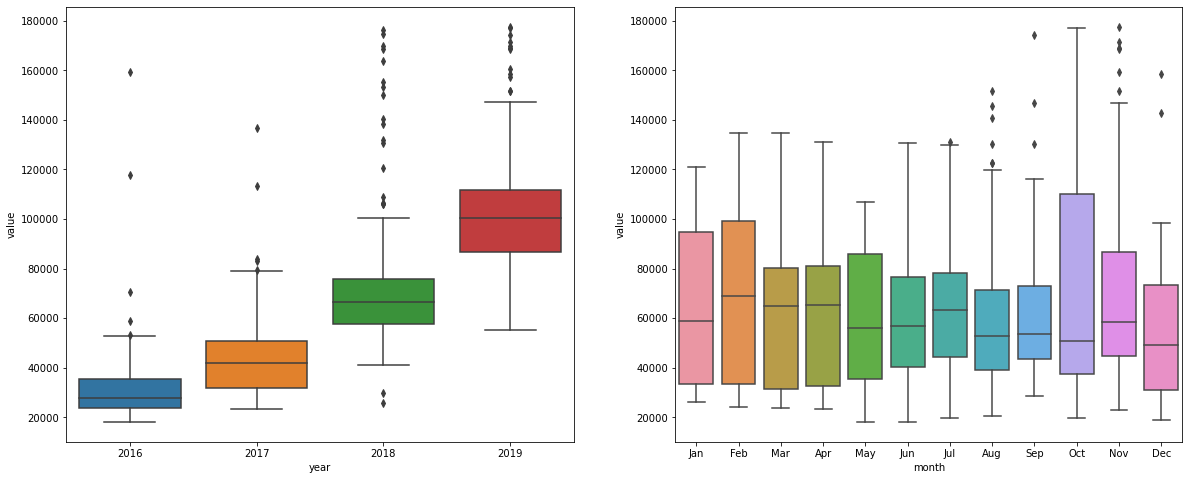

In [80]:
fig, (ax1, ax2) = plt.subplots(figsize=(20, 8), nrows=1, ncols=2)
sns.boxplot(ax=ax1, data=df_box, x='year', y='value')
sns.boxplot(ax=ax2, data=df_box, x='month', y='value')

__Set 'Year-Wise Box Plot' & 'Month-Wise Box Plot' Graphic Layout:__

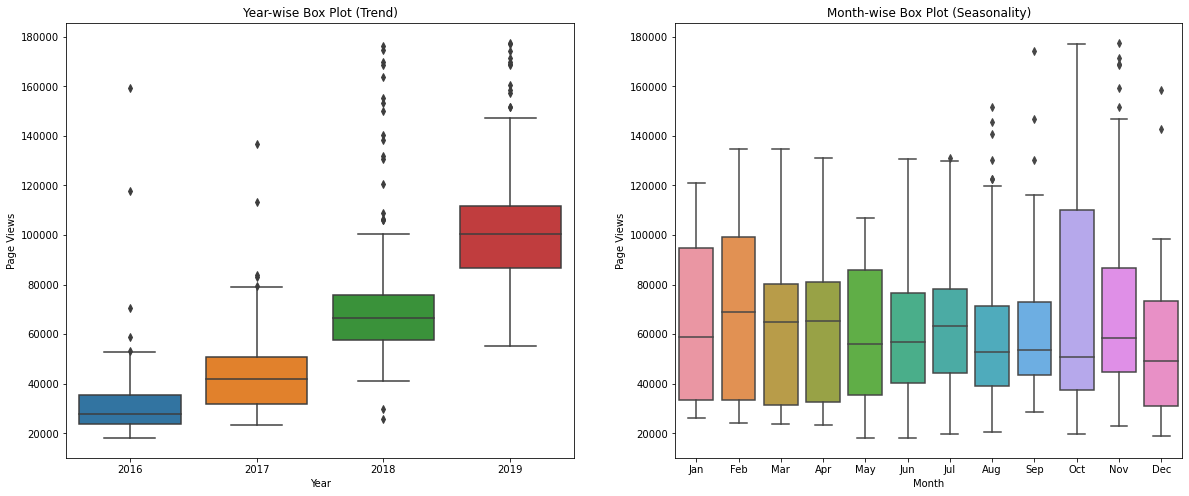

In [81]:
# Set 'Year-Wise Box Plot' Graphic Layout
ax1.set_title('Year-wise Box Plot (Trend)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')

# Set 'Month-Wise Box Plot' Graphic Layout
ax2.set_title('Month-wise Box Plot (Seasonality)')
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')

fig

__Save Box Plot graphic:__

In [82]:
fig.savefig('box_plot.png')

***